In [1]:
import os
os.environ['USE_PYGEOS'] = '0' 

import geopandas as gpd
from  fiona import listlayers

#maps
ecuadorMaps='https://github.com/vaaleriaa111/geodfECU/raw/main/maps/ecuadorMaps.gpkg'

#layers in maps
listlayers(ecuadorMaps)

['edificado', 'vias', 'aeropuertos']

In [4]:
edificado=gpd.read_file(ecuadorMaps,layer='edificado')
vias=gpd.read_file(ecuadorMaps,layer='vias')
aeropuertos=gpd.read_file(ecuadorMaps,layer='aeropuertos')

In [5]:
# verifico que tengan el mismo crs
edificado.crs.to_epsg()==vias.crs.to_epsg()==aeropuertos.crs.to_epsg()

True

<AxesSubplot:>

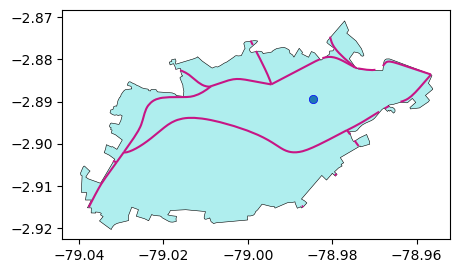

In [6]:
# solo cuenca
cuenca=edificado[edificado.nam=='CUENCA']

# recortando la data 
vias_cuenca = gpd.clip(gdf=vias,mask=cuenca)
aeropuertos_cuenca = gpd.clip(gdf=aeropuertos,mask=cuenca)

# muestro la data recortada 
base = cuenca.plot(facecolor="paleturquoise", edgecolor='black', linewidth=0.4,figsize=(5,5))
vias_cuenca.plot(marker='+', color='mediumvioletred', markersize=15,ax=base)
aeropuertos_cuenca.plot(edgecolor='blue', linewidth=0.5,ax=base)